In [82]:
EuropeanSales= read.csv("C:\\Users\\busea\\Desktop\\EuropeanSales.csv", header=TRUE, sep=",")
EuropeanSales

Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
Austria,8.4,49.60,4.2,5.8,112,941
Belgium,10.5,47.09,8.1,5.9,160,1682
Bulgaria,7.6,6.55,13.5,3.5,20,154
Czech Rep.,10.2,20.67,6.6,4.4,101,1029
Denmark,5.5,62.12,5.2,8.4,170,935
Finland,5.3,51.32,9.9,6.3,372,1971
France,61.9,44.51,10.0,5.7,96,5929
Germany,82.5,44.45,9.1,4.6,83,6824
Greece,11.2,31.67,9.9,3.9,73,813
Hungary,10.0,15.41,7.3,5.1,45,449


In [83]:
attributes(EuropeanSales)
summary(EuropeanSales)

$names
[1] "Country"           "Population"        "GDPperHead"       
[4] "UnemploymentRate"  "EducationSpending" "SalesPerCapita"   
[7] "ComputerSales"    

$class
[1] "data.frame"

$row.names
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21

       Country     Population      GDPperHead    UnemploymentRate
 Austria   : 1   Min.   : 4.40   Min.   : 6.55   Min.   : 3.6    
 Belgium   : 1   1st Qu.: 8.40   1st Qu.:20.67   1st Qu.: 6.3    
 Bulgaria  : 1   Median :10.70   Median :43.54   Median : 7.3    
 Czech Rep.: 1   Mean   :26.72   Mean   :36.97   Mean   : 8.1    
 Denmark   : 1   3rd Qu.:44.80   3rd Qu.:51.32   3rd Qu.: 9.9    
 Finland   : 1   Max.   :82.50   Max.   :64.43   Max.   :14.4    
 (Other)   :15                                                   
 EducationSpending SalesPerCapita  ComputerSales 
 Min.   :3.300     Min.   : 20.0   Min.   : 154  
 1st Qu.:4.400     1st Qu.: 68.0   1st Qu.: 813  
 Median :5.000     Median :101.0   Median :1682  
 Mean   :5.181     Mean   :115.3   Mean   :2493  
 3rd Qu.:5.800     3rd Qu.:151.0   3rd Qu.:2879  
 Max.   :8.400     Max.   :372.0   Max.   :9887  
                                                 

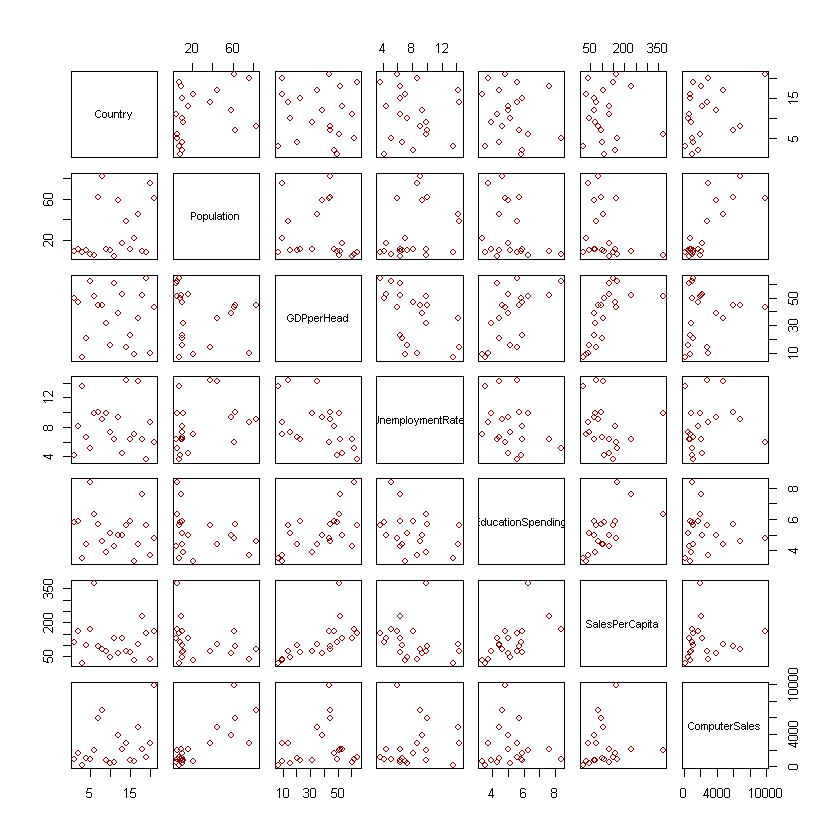

In [84]:
plot(EuropeanSales, col = "dark red")

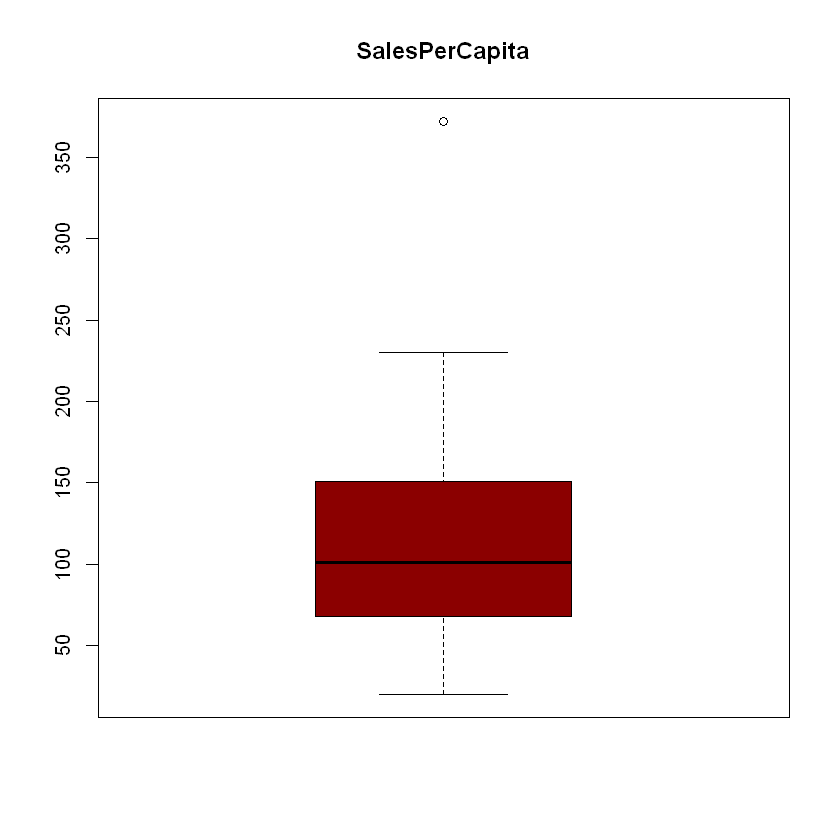

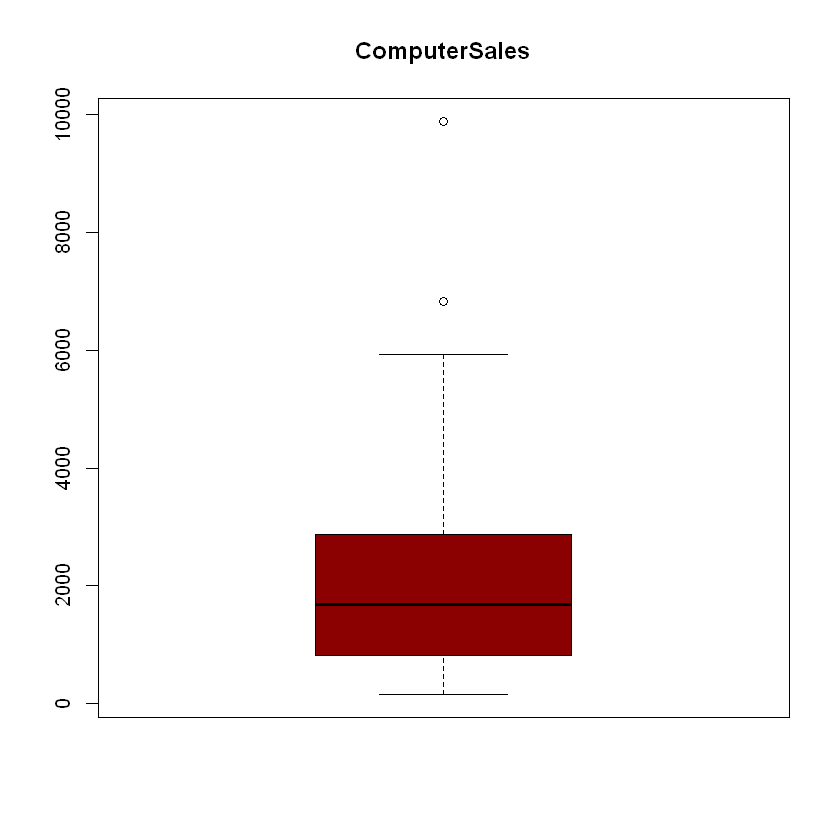

In [85]:
boxplot(EuropeanSales$SalesPerCapita,col="dark red", main = 'SalesPerCapita')
boxplot(EuropeanSales$ComputerSales,col="dark red", main = 'ComputerSales')

In [86]:
#convert country to dummy variables
EuropeanSales$Country=factor(EuropeanSales$Country, 
                                 levels = c("Austria", "Belgium", "Bulgaria", "Czech Rep.","Denmark", "Finland","France","Germany",
                                            "Greece","Hungary","Ireland","Italy","Netherlands","Poland","Portugal","Romania","Spain",
                                            "Switzerland","Sweden","Turkey","UK"), labels = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) )

EuropeanSales$Country<-as.integer(EuropeanSales$Country)

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
Country,1.00000000,0.3529976,-0.0904680,-0.0657977,-0.13769985,-0.06642873,0.34313933
Population,0.35299762,1.0000000,-0.1752359,0.3210351,-0.29288051,-0.29838340,0.80797112
GDPperHead,-0.09046800,-0.1752359,1.0000000,-0.5024185,0.58911054,0.66225363,0.15155568
UnemploymentRate,-0.06579770,0.3210351,-0.5024185,1.0000000,-0.31430933,-0.21360529,0.17184911
EducationSpending,-0.13769985,-0.2928805,0.5891105,-0.3143093,1.00000000,0.61217963,-0.05269015
SalesPerCapita,-0.06642873,-0.2983834,0.6622536,-0.2136053,0.61217963,1.00000000,0.08141779
ComputerSales,0.34313933,0.8079711,0.1515557,0.1718491,-0.05269015,0.08141779,1.00000000


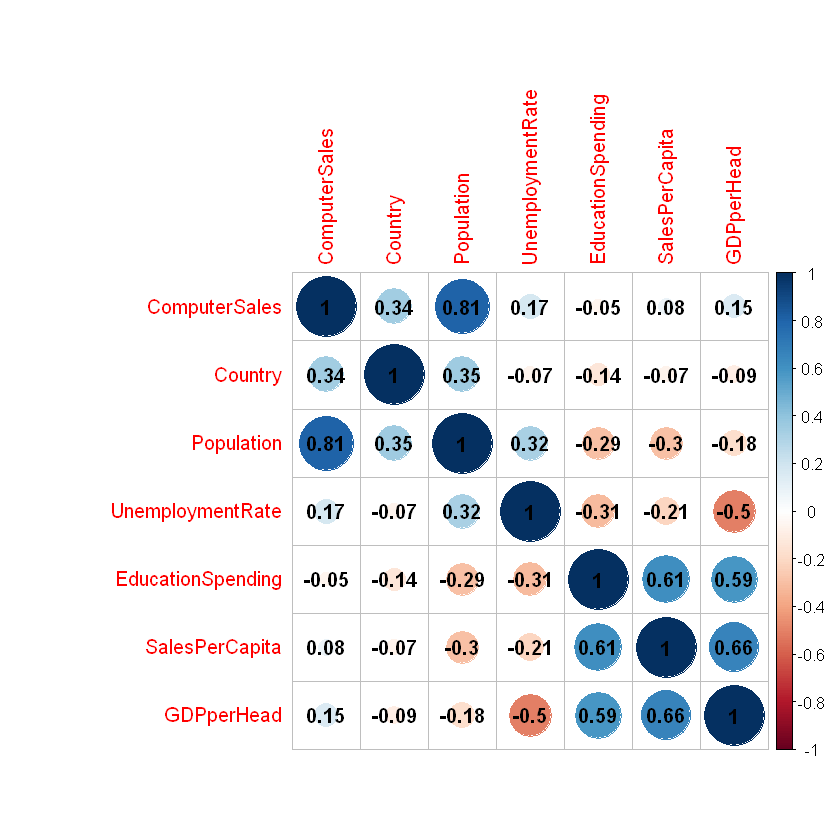

In [87]:
library(corrplot)
cor_EuropeanSales=cor(EuropeanSales[,])
cor_EuropeanSales
corrplot(cor_EuropeanSales, type = "full", order = "AOE", addCoef.col = "black" )


In [88]:
# Model for SalesPerCapita

model1 <- lm(SalesPerCapita ~ GDPperHead , data=EuropeanSales)
summary(model1)

model2 <- lm(SalesPerCapita ~ GDPperHead  + UnemploymentRate, data=EuropeanSales)
summary(model2)

model3 <- lm(SalesPerCapita ~ GDPperHead + Population , data=EuropeanSales)
summary(model3)

model4 <- lm(SalesPerCapita ~ GDPperHead  + EducationSpending + Population, data=EuropeanSales)
summary(model4)

model5 <- lm(SalesPerCapita ~ GDPperHead  + EducationSpending + Population + ComputerSales, data=EuropeanSales)
summary(model5)

# It seems model5 is the best for sales per capita. 
# Because R-squared value higher than other models and p-value is low and it means the model statistically significant. 


Call:
lm(formula = SalesPerCapita ~ GDPperHead, data = EuropeanSales)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.584 -38.731  -9.879  16.306 216.447 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  11.6761    29.9902   0.389  0.70136   
GDPperHead    2.8035     0.7277   3.853  0.00107 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60.71 on 19 degrees of freedom
Multiple R-squared:  0.4386,	Adjusted R-squared:  0.409 
F-statistic: 14.84 on 1 and 19 DF,  p-value: 0.001073



Call:
lm(formula = SalesPerCapita ~ GDPperHead + UnemploymentRate, 
    data = EuropeanSales)

Residuals:
    Min      1Q  Median      3Q     Max 
-59.856 -32.481 -12.669   8.062 204.332 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)      -33.4927    64.4695  -0.520  0.60973   
GDPperHead         3.1424     0.8499   3.697  0.00165 **
UnemploymentRate   4.0294     5.0770   0.794  0.43774   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 61.31 on 18 degrees of freedom
Multiple R-squared:  0.4576,	Adjusted R-squared:  0.3973 
F-statistic: 7.592 on 2 and 18 DF,  p-value: 0.004066



Call:
lm(formula = SalesPerCapita ~ GDPperHead + Population, data = EuropeanSales)

Residuals:
   Min     1Q Median     3Q    Max 
-59.59 -32.73 -19.41  19.71 206.27 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  32.0289    35.2854   0.908  0.37602   
GDPperHead    2.6640     0.7358   3.620  0.00196 **
Population   -0.5685     0.5253  -1.082  0.29344   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60.44 on 18 degrees of freedom
Multiple R-squared:  0.4729,	Adjusted R-squared:  0.4143 
F-statistic: 8.074 on 2 and 18 DF,  p-value: 0.003142



Call:
lm(formula = SalesPerCapita ~ GDPperHead + EducationSpending + 
    Population, data = EuropeanSales)

Residuals:
   Min     1Q Median     3Q    Max 
-63.30 -33.21 -13.92  15.83 199.24 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)       -43.9727    63.3502  -0.694   0.4970  
GDPperHead          1.9532     0.8718   2.241   0.0387 *
EducationSpending  18.8188    13.1863   1.427   0.1716  
Population         -0.3896     0.5260  -0.741   0.4690  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 58.77 on 17 degrees of freedom
Multiple R-squared:  0.5293,	Adjusted R-squared:  0.4462 
F-statistic: 6.372 on 3 and 17 DF,  p-value: 0.004316



Call:
lm(formula = SalesPerCapita ~ GDPperHead + EducationSpending + 
    Population + ComputerSales, data = EuropeanSales)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.663 -20.079 -12.263   3.392 188.984 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)       -20.076775  62.210155  -0.323   0.7511  
GDPperHead          1.341203   0.912651   1.470   0.1611  
EducationSpending  17.720604  12.603113   1.406   0.1788  
Population         -1.728230   0.961751  -1.797   0.0912 .
ComputerSales       0.016125   0.009881   1.632   0.1222  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 56.09 on 16 degrees of freedom
Multiple R-squared:  0.5964,	Adjusted R-squared:  0.4955 
F-statistic: 5.912 on 4 and 16 DF,  p-value: 0.00406


In [89]:
# Model for  ComputerSales
model6 <- lm(ComputerSales ~ Population + GDPperHead, data=EuropeanSales)
summary(model6)

model7 <- lm(ComputerSales ~ Population + GDPperHead + UnemploymentRate, data=EuropeanSales)
summary(model7)

model8 <- lm(ComputerSales ~ Population + UnemploymentRate + EducationSpending , data=EuropeanSales)
summary(model8)

# It seems model6 is the best for sales computer sales. 
# Because R-squared value higher than model8 and similar to model7 but R-squared and Adjusted R-squared values are closer than model7.
# And p-value is low and it means the model statistically significant. 


Call:
lm(formula = ComputerSales ~ Population + GDPperHead, data = EuropeanSales)

Residuals:
    Min      1Q  Median      3Q     Max 
-2560.6  -566.1   115.6   456.7  4304.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1206.88     782.23  -1.543    0.140    
Population     82.37      11.65   7.073 1.35e-06 ***
GDPperHead     40.53      16.31   2.484    0.023 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1340 on 18 degrees of freedom
Multiple R-squared:  0.7415,	Adjusted R-squared:  0.7127 
F-statistic: 25.81 on 2 and 18 DF,  p-value: 5.159e-06



Call:
lm(formula = ComputerSales ~ Population + GDPperHead + UnemploymentRate, 
    data = EuropeanSales)

Residuals:
    Min      1Q  Median      3Q     Max 
-2396.4  -564.7    47.2   316.3  4451.7 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1765.39    1442.89  -1.224   0.2378    
Population          80.79      12.38   6.526 5.18e-06 ***
GDPperHead          44.75      19.00   2.356   0.0307 *  
UnemploymentRate    54.86     117.95   0.465   0.6478    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1370 on 17 degrees of freedom
Multiple R-squared:  0.7447,	Adjusted R-squared:  0.6997 
F-statistic: 16.53 on 3 and 17 DF,  p-value: 2.747e-05



Call:
lm(formula = ComputerSales ~ Population + UnemploymentRate + 
    EducationSpending, data = EuropeanSales)

Residuals:
    Min      1Q  Median      3Q     Max 
-3173.2  -638.9   117.1   287.3  4560.8 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1350.61    2019.95  -0.669    0.513    
Population           84.17      13.92   6.047 1.31e-05 ***
UnemploymentRate    -40.99     117.28  -0.350    0.731    
EducationSpending   371.79     285.68   1.301    0.210    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1505 on 17 degrees of freedom
Multiple R-squared:  0.692,	Adjusted R-squared:  0.6377 
F-statistic: 12.73 on 3 and 17 DF,  p-value: 0.0001311


In [90]:
#Model attributes and coefficients  
attributes(model1)
model1$coefficients

attributes(model2)
model2$coefficients

attributes(model6)
model7$coefficients

attributes(model7)
model8$coefficients


$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

(Intercept)  GDPperHead 
  11.676085    2.803532

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

(Intercept)       GDPperHead UnemploymentRate 
      -33.492678         3.142445         4.029366

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

(Intercept)       Population       GDPperHead UnemploymentRate 
     -1765.39329         80.79450         44.75421         54.85586

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

(Intercept)        Population  UnemploymentRate EducationSpending 
      -1350.61235          84.16534         -40.99228         371.79279